In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoke-fire-detection-yolo/data.yaml
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/PublicDataset01019.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/WEB08651.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/WEB07304.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/WEB07388.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/WEB02204.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/WEB04894.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/AoF05996.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/WEB04652.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/AoF02633.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/PublicDataset00006.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/WEB07369.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/AoF01286.txt
/kaggle/input/smoke-fire-detection-yolo/data/val/labels/AoF06607.txt
/kaggle/input/smoke-fire-detectio

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [3]:
import yaml

yaml_path = "/kaggle/input/smoke-fire-detection-yolo/data.yaml"

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Update the paths to match Kaggle input folder
data['train'] = "/kaggle/input/smoke-fire-detection-yolo/data/train/images"
data['val'] = "/kaggle/input/smoke-fire-detection-yolo/data/val/images"

# Save updated YAML to working directory
with open("/kaggle/working/data.yaml", 'w') as f:
    yaml.dump(data, f)

print("Updated data.yaml saved at /kaggle/working/data.yaml")

Updated data.yaml saved at /kaggle/working/data.yaml


In [4]:
from ultralytics import YOLO

# Load a YOLO model (can use yolov8n, yolov8s, yolov8m, etc.)
model = YOLO("yolov8n.pt")  # n = nano, fastest; s = small; m = medium

# Train
model.train(
    data="/kaggle/working/data.yaml",  # Path to YAML file
    epochs=20,
    imgsz=640,
    batch=16
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 19.5±13.0 MB/s, size: 133.6 KB)


train: Scanning /kaggle/input/smoke-fire-detection-yolo/data/train/labels... 14101 images, 6457 backgrounds, 21 corrupt: 100%|██████████| 14122/14122 [00:52<00:00, 266.95it/s]

train: /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB02521.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB02521.jpg'
train: /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB06626.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB06626.jpg'
train: /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07199.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07199.jpg'
train: /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07271.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07271.jpg'
train: /kaggle/input/smoke-fire-detection-yolo/data/train/images/WEB07278.jpg: ignoring corrupt image/label: [Errno 30] Read-only file s

WARNING ⚠️ train: Cache directory /kaggle/input/smoke-fire-detection-yolo/data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 12.7±8.5 MB/s, size: 79.9 KB)


val: Scanning /kaggle/input/smoke-fire-detection-yolo/data/val/labels... 3094 images, 1375 backgrounds, 5 corrupt: 100%|██████████| 3099/3099 [00:13<00:00, 232.76it/s]

val: /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07535.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07535.jpg'
val: /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07536.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07536.jpg'
val: /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07539.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07539.jpg'
val: /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07542.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07542.jpg'
val: /kaggle/input/smoke-fire-detection-yolo/data/val/images/WEB07561.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/smoke-

WARNING ⚠️ val: Cache directory /kaggle/input/smoke-fire-detection-yolo/data/val is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       2.1G      1.685      2.502      1.566          9        640: 100%|██████████| 882/882 [02:38<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:14<00:00,  6.64it/s]


                   all       3094       3917      0.439      0.384      0.346      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.96G      1.739      1.953      1.602         15        640: 100%|██████████| 882/882 [02:32<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.18it/s]


                   all       3094       3917      0.461       0.44      0.419       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.97G      1.723      1.874      1.581         10        640: 100%|██████████| 882/882 [02:31<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.25it/s]


                   all       3094       3917      0.493      0.437      0.423      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         3G      1.689      1.809      1.561         14        640: 100%|██████████| 882/882 [02:30<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.21it/s]


                   all       3094       3917      0.481      0.471      0.481       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.01G      1.644      1.731      1.521          5        640: 100%|██████████| 882/882 [02:30<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.19it/s]


                   all       3094       3917      0.533      0.459      0.483      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.04G      1.592      1.642      1.494         15        640: 100%|██████████| 882/882 [02:30<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:12<00:00,  7.52it/s]


                   all       3094       3917       0.59      0.536      0.563      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.04G      1.575      1.587      1.472          3        640: 100%|██████████| 882/882 [02:29<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.46it/s]


                   all       3094       3917       0.62      0.563      0.597      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.07G      1.543      1.523      1.451         10        640: 100%|██████████| 882/882 [02:29<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.35it/s]


                   all       3094       3917      0.605      0.565      0.589      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.08G      1.528      1.486       1.44          9        640: 100%|██████████| 882/882 [02:30<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.38it/s]


                   all       3094       3917      0.638      0.585      0.626      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.11G      1.516      1.467      1.432         12        640: 100%|██████████| 882/882 [02:32<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.27it/s]


                   all       3094       3917      0.654      0.574      0.633      0.327
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.11G      1.579      1.462      1.493         12        640: 100%|██████████| 882/882 [02:25<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.37it/s]


                   all       3094       3917      0.672      0.591      0.652      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.14G      1.563      1.419      1.477          2        640: 100%|██████████| 882/882 [02:24<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:12<00:00,  7.56it/s]


                   all       3094       3917      0.662      0.603      0.652      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.14G      1.537      1.372      1.455          4        640: 100%|██████████| 882/882 [02:25<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:12<00:00,  7.51it/s]


                   all       3094       3917      0.676      0.602      0.658      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.17G      1.509      1.326      1.437          2        640: 100%|██████████| 882/882 [02:23<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:12<00:00,  7.51it/s]


                   all       3094       3917      0.685      0.624      0.678      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.18G      1.492      1.291      1.421         12        640: 100%|██████████| 882/882 [02:26<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.05it/s]


                   all       3094       3917      0.687      0.643      0.693      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       3.2G      1.464      1.251      1.406          9        640: 100%|██████████| 882/882 [02:26<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.39it/s]


                   all       3094       3917      0.721      0.638      0.704      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.21G      1.435      1.206      1.387          2        640: 100%|██████████| 882/882 [02:24<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.34it/s]

                   all       3094       3917      0.704      0.643      0.706      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.24G      1.415      1.166      1.366          6        640: 100%|██████████| 882/882 [02:26<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.37it/s]

                   all       3094       3917      0.695      0.667      0.718       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.25G      1.397      1.136      1.358          2        640: 100%|██████████| 882/882 [02:25<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.20it/s]


                   all       3094       3917      0.716       0.66      0.725      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.27G      1.373        1.1      1.336          3        640: 100%|██████████| 882/882 [02:25<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.37it/s]

                   all       3094       3917      0.731      0.661      0.726       0.42



20 epochs completed in 0.901 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.11it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       3094       3917      0.731      0.661      0.727       0.42
                 smoke       1545       1751      0.777       0.73      0.782      0.481
                  fire        875       2166      0.684      0.593      0.671      0.359
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d5ecbe9d650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [9]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

# Load YOLO model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

def predict_fire_kaggle(img_path):
    # 1. Check if image exists
    img_path = Path(img_path)
    if not img_path.exists():
        raise FileNotFoundError(f"Image not found: {img_path}")

    # 2. Read image
    img = cv2.imread(str(img_path))
    if img is None:
        raise ValueError("Image could not be read.")

    # Show original image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Input Image")
    plt.show()

    # 3. Run YOLO prediction
    results = model.predict(source=str(img_path), save=True, imgsz=640, conf=0.25)

    # 4. Display predicted image
    pred_img_path = Path(results[0].save_dir) / img_path.name
    pred_img = cv2.imread(str(pred_img_path))
    plt.imshow(cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("YOLO Prediction")
    plt.show()

# Example usage:
# predict_fire_kaggle("/kaggle/input/smoke-fire-detection-yolo/data/test/images/example.jpg")


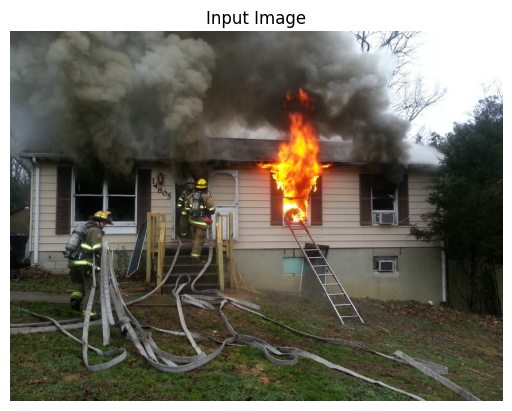


image 1/1 /kaggle/input/demo-test/fire1.jpg: 480x640 1 smoke, 1 fire, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2


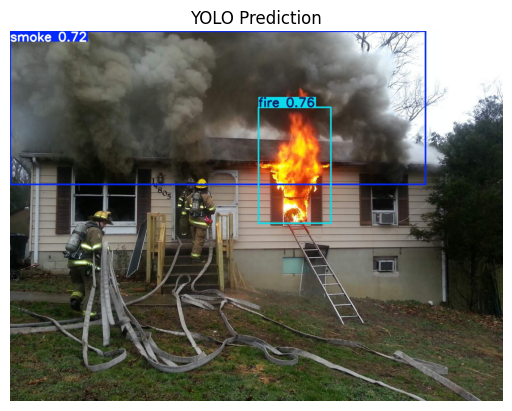

In [15]:
predict_fire_kaggle("/kaggle/input/demo-test/fire1.jpg")